# Importing Required Libraries 
Numpy For linear algebra |
Pandas For Data processing, CSV file I/O (e.g. pd.read_csv) |
Matplotlib For Data Visualizations

In [2]:

import numpy as np 
import pandas as pd # 

import time, warnings
import datetime as dt

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
retail_df = pd.read_csv('retail_Dataset.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


# creating a new column "Amount" by multiplying "Quantity" and "Unit Price"



In [4]:
retail_df["Amount"]= retail_df["Quantity"]*retail_df["UnitPrice"]
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom,54.08


# Counting Null fields 

In [5]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Amount              0
dtype: int64

# Datatypes of Features

In [6]:
retail_df.dtypes 


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

# brief summary for columns whose data types are NOT NUMBER

In [7]:
retail_df.describe(exclude="number")  


,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country
count,541909,541909,540455,541909,406829,541909
unique,25900,4070,4223,23260,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,17841,United Kingdom
freq,1114,2313,2369,1114,7983,495478


# summary for columns whose data types are NUMBER



In [8]:
retail_df.describe() 

,Quantity,UnitPrice,Amount
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,17.987795
std,218.081158,96.759853,378.810824
min,-80995.000000,-11062.060000,-168469.600000
25%,1.000000,1.250000,3.400000
50%,3.000000,2.080000,9.750000
75%,10.000000,4.130000,17.400000
max,80995.000000,38970.000000,168469.600000


# Number of rows and  columns

In [9]:
retail_df.shape 


(541909, 9)

# Converting a column's datatype to datetime



In [10]:
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])
retail_df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [11]:
retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Fetching proportions of Country with the parameter "normalize=True"

In [12]:

retail_df.Country.value_counts(normalize=True) 

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

# Proportion of UK customers



In [13]:

retail_df[retail_df["Country"]=="United Kingdom"].CustomerID.nunique() / retail_df.CustomerID.nunique() 


0.903476669716377

# Observations:
90% of the customers are from UK

# Forming a sub-sample which includes only the customers from UK



In [14]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.shape

(495478, 9)

# Removing canceled orders

In [15]:

retail_uk = retail_uk[retail_uk['Quantity']>0]
retail_uk.shape


(486286, 9)

# Removing rows where customerID are NA since going to do CUSTOMER SEGMENTATION



In [16]:
retail_uk.dropna(subset=['CustomerID'],how='all',inplace=True) 

retail_uk.shape


(354345, 9)

# Average total quantity ordered by a customer

In [17]:
np.mean(retail_uk.groupby("CustomerID").Quantity.sum())

1088.87324662076

# Average total amount spent by a customer



In [18]:
np.mean(retail_uk.groupby("CustomerID").Amount.sum())

1863.910113236418

# Exploring the unique values of each attribute



In [19]:
print("Summary..")
print("Number of invoices: ", retail_uk['InvoiceNo'].nunique())
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_uk['CustomerID'].isnull().sum() * 100 / len(retail_uk),2),"%" )
print("Average quantity of product purchased by a customer: ", round(np.mean(retail_uk.groupby("CustomerID").Quantity.sum()), 0))
print("Average revenue generated per customer: ", round(np.mean(retail_uk.groupby("CustomerID").Amount.sum()), 2))
print("Average product quantity sold per transaction: ", round(retail_uk.Quantity.mean(), 0))
print("Average revenue generated per transaction: ", round(retail_uk.Amount.mean(), 2) )

Summary..
Number of invoices:  16649
Number of products bought:  3645
Number of customers: 3921
Percentage of customers NA:  0.0 %
Average quantity of product purchased by a customer:  1089.0
Average revenue generated per customer:  1863.91
Average product quantity sold per transaction:  12.0
Average revenue generated per transaction:  20.63


# check for NaN's values to see if dataset is ready to go



In [20]:

retail_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  object        
 7   Country      354345 non-null  object        
 8   Amount       354345 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.0+ MB


# Create a new column called date which contains the date of invoice only


In [21]:
retail_uk['date'] = pd.DatetimeIndex(retail_uk['InvoiceDate']).date

In [22]:
retail_uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


# CREATING RECENCY DATAFRAME
group by customers and check the last date of purchase

In [23]:

recency_df = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346,2011-01-18
1,12747,2011-12-07
2,12748,2011-12-09
3,12749,2011-12-06
4,12820,2011-12-06


# Calculating recency

In [26]:
now = dt.date(2011,12,9)
print(now)
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)

2011-12-09


In [27]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346,2011-01-18,325
1,12747,2011-12-07,2
2,12748,2011-12-09,0
3,12749,2011-12-06,3
4,12820,2011-12-06,3


# Droping LastPurchaseDate as it is not needed anymore


In [28]:
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

# CREATING FREQUENCY DATAFRAME
droping duplicates

In [29]:
retail_uk_copy = retail_uk
retail_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], inplace=True) 

# Calculating frequency of purchases



In [30]:
frequency_df = retail_uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12747,11
2,12748,210
3,12749,5
4,12820,4


In [31]:
retail_uk_copy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16649 entries, 0 to 541890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    16649 non-null  object        
 1   StockCode    16649 non-null  object        
 2   Description  16649 non-null  object        
 3   Quantity     16649 non-null  int64         
 4   InvoiceDate  16649 non-null  datetime64[ns]
 5   UnitPrice    16649 non-null  float64       
 6   CustomerID   16649 non-null  object        
 7   Country      16649 non-null  object        
 8   Amount       16649 non-null  float64       
 9   date         16649 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ MB


# Amount spent by each individual customer

In [32]:
monetary_df = retail_uk.groupby(by='CustomerID',as_index=False)['Amount'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346,77183.60
1,12747,689.49
2,12748,3841.31
3,12749,98.35
4,12820,58.20


# RFM TABLE

merging recency dataframe with frequency dataframe, resulting a temporary dataframe

In [33]:

temp_df = recency_df.merge(frequency_df,on='CustomerID')
temp_df.head()

,CustomerID,Recency,Frequency
0,12346,325,1
1,12747,2,11
2,12748,0,210
3,12749,3,5
4,12820,3,4


# Merging with monetary dataframe to get a table with the 3 columns



In [34]:
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77183.60
1,12747,2,11,689.49
2,12748,0,210,3841.31
3,12749,3,5,98.35
4,12820,3,4,58.20
...,...,...,...,...
3916,18280,277,1,23.70
3917,18281,180,1,5.04
3918,18282,7,2,38.25
3919,18283,3,16,66.75


# Making 0's 1, As 0's in Recency column can be ignored



In [35]:
rfm_df['Recency'] = rfm_df["Recency"] + 1

# outlier treatment: the algorithm which is going to be used is vulnerable to outliers which are very very manipulative
if not exclude outliers, the results will be heavily influenced

In [36]:


Q1 = rfm_df.Recency.quantile(0.25)
Q3 = rfm_df.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Recency >= (Q1 - 1.5*IQR)) & (rfm_df.Recency <= (Q3 + 1.5*IQR))]
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,11,689.49
2,12748,1,210,3841.31
3,12749,4,5,98.35
4,12820,4,4,58.20
...,...,...,...,...
3916,18280,278,1,23.70
3917,18281,181,1,5.04
3918,18282,8,2,38.25
3919,18283,4,16,66.75


# Outlier treatment for frequency



In [37]:
Q1 = rfm_df.Frequency.quantile(0.25)
Q3 = rfm_df.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Frequency >= (Q1 - 1.5*IQR)) & (rfm_df.Frequency <= (Q3 + 1.5*IQR))]
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,11,689.49
3,12749,4,5,98.35
4,12820,4,4,58.20
5,12821,215,1,19.92
...,...,...,...,...
3915,18278,74,1,17.00
3916,18280,278,1,23.70
3917,18281,181,1,5.04
3918,18282,8,2,38.25


# Outlier treatment for monetary



In [38]:
Q1 = rfm_df.Monetary.quantile(0.25)
Q3 = rfm_df.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Monetary >= (Q1 - 1.5*IQR)) & (rfm_df.Monetary <= (Q3 + 1.5*IQR))]
rfm_df

,CustomerID,Recency,Frequency,Monetary
3,12749,4,5,98.35
4,12820,4,4,58.20
5,12821,215,1,19.92
6,12822,71,2,30.80
8,12824,60,1,5.04
...,...,...,...,...
3915,18278,74,1,17.00
3916,18280,278,1,23.70
3917,18281,181,1,5.04
3918,18282,8,2,38.25


# Importing modules for k-Means Algorithm


In [39]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Scaling is crucial step to make k-Means clustering to work better

scaling Recency values to the range (0,1)



In [40]:

rfm_df["R"]= (rfm_df["Recency"]-rfm_df["Recency"].min())/(rfm_df["Recency"].max()-rfm_df["Recency"].min())


# scaling Frequency values to the range (0,1)



In [41]:
rfm_df["F"]= (rfm_df["Frequency"]-rfm_df["Frequency"].min())/(rfm_df["Frequency"].max()-rfm_df["Frequency"].min())

# scaling Monetary values to the range (0,1)



In [42]:
rfm_df["M"]= (rfm_df["Monetary"]-rfm_df["Monetary"].min())/(rfm_df["Monetary"].max()-rfm_df["Monetary"].min())
rfm_df.head()



,CustomerID,Recency,Frequency,Monetary,R,F,M
3,12749,4,5,98.35,0.009119,0.4,0.431227
4,12820,4,4,58.20,0.009119,0.3,0.255185
5,12821,215,1,19.92,0.650456,0.0,0.087342
6,12822,71,2,30.80,0.212766,0.1,0.135046
8,12824,60,1,5.04,0.179331,0.0,0.022098


# Observations
In this analysis, the value of the customer is inversely proportional to the Recency value and directly proportional to the Frequency and Monetary values.

# Now,forming a new DataFrame,So RFM analysis can be made



In [43]:

df = rfm_df
df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
3,12749,4,5,98.35,0.009119,0.4,0.431227
4,12820,4,4,58.20,0.009119,0.3,0.255185
5,12821,215,1,19.92,0.650456,0.0,0.087342
6,12822,71,2,30.80,0.212766,0.1,0.135046
8,12824,60,1,5.04,0.179331,0.0,0.022098


<AxesSubplot:>

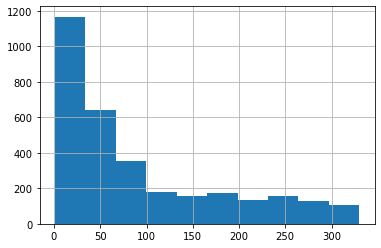

In [44]:
df["Recency"].hist()

<AxesSubplot:>

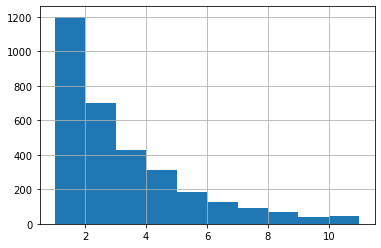

In [45]:
df["Frequency"].hist()



<AxesSubplot:>

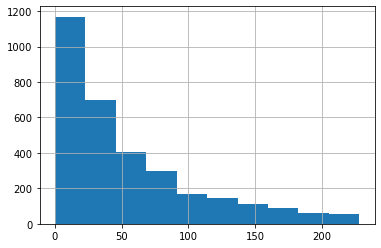

In [46]:
df["Monetary"].hist()



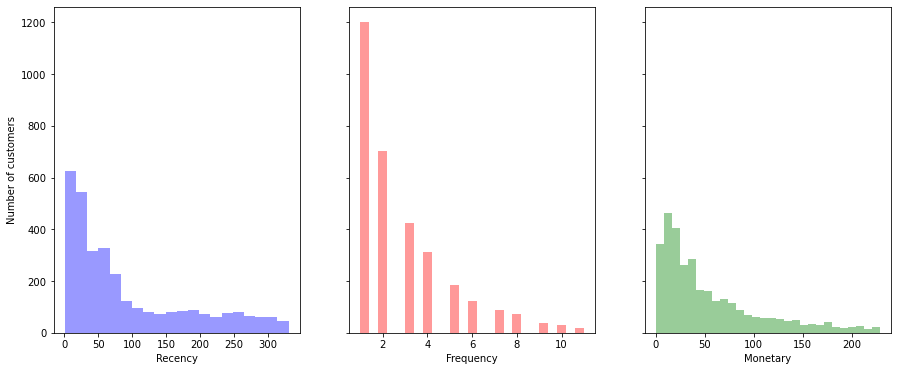

In [47]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows= 1, ncols= 3, sharey=True, figsize=(15, 6))

sns.distplot(df["Recency"], ax=ax0, kde=False, color='b')
ax0.set(xlabel="Recency", ylabel="Number of customers")

sns.distplot(df["Frequency"], ax=ax1, kde=False, color='r')
ax1.set(xlabel="Frequency")

sns.distplot(df["Monetary"], ax=ax2, kde=False, color='g')
ax2.set(xlabel="Monetary")


fig.savefig("Histograms of Attributes")

# Resetting index for future concatenate purposes



In [48]:
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12749,4,5,98.35,0.009119,0.4,0.431227
1,12820,4,4,58.20,0.009119,0.3,0.255185
2,12821,215,1,19.92,0.650456,0.0,0.087342
3,12822,71,2,30.80,0.212766,0.1,0.135046
4,12824,60,1,5.04,0.179331,0.0,0.022098
...,...,...,...,...,...,...,...
3190,18278,74,1,17.00,0.221884,0.0,0.074539
3191,18280,278,1,23.70,0.841945,0.0,0.103915
3192,18281,181,1,5.04,0.547112,0.0,0.022098
3193,18282,8,2,38.25,0.021277,0.1,0.167712


# HOPKIN's STATISTICS
Tells how much data is suitable to cluster

In [49]:


from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [50]:
hopkins(df[["R","F","M"]])



0.9138419006467406

# Forming a new DF which includes only scaled R,F,M scores



In [51]:

df_1 = df[["CustomerID","R","F","M"]]
df_1.set_index("CustomerID", inplace=True)
df_1.head(20)

,R,F,M
CustomerID,,,
12749,0.009119,0.4,0.431227
12820,0.009119,0.3,0.255185
12821,0.650456,0.0,0.087342
12822,0.212766,0.1,0.135046
12824,0.179331,0.0,0.022098
12826,0.006079,0.6,0.538431
12827,0.015198,0.2,0.369229
12828,0.006079,0.5,0.678739
12831,0.796353,0.0,0.149954


# DENDROGRAM

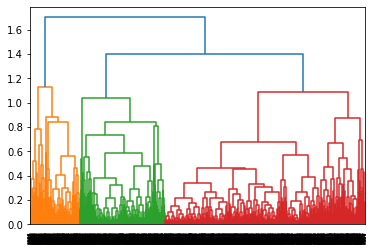

In [52]:


d = linkage(df_1, method='complete')
dendrogram(d,
          leaf_rotation=90,
          leaf_font_size=5)
plt.show()

# From dendrogram, it can be said that the possible numbers of clusters are 3,4,5,6 



In [53]:


model = KMeans(n_clusters= 4, init= 'random', max_iter= 500, tol= 1e-10)

In [54]:
model.fit(df_1)
print(model.cluster_centers_)
print(model.labels_)
print(model.inertia_)
print(model.n_iter_)


[[0.15295345 0.06322478 0.10366315]
 [0.12135585 0.30456989 0.32311493]
 [0.69715075 0.05076336 0.14626977]
 [0.10989414 0.53251232 0.68718758]]
[1 1 2 ... 2 0 1]
152.3215108391743
23


# FIND OPTIMUM "K" for k-Means



In [55]:

from sklearn.metrics import silhouette_score
sse_ = []
ssd = []
centroids_from_kmeans = []
iterations = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters= k, init= 'random', n_init= 100, max_iter= 500, tol= 1e-10).fit(df_1)
    sse_.append([k, silhouette_score(df_1, kmeans.labels_)])
    ssd.append([k, kmeans.inertia_])
    centroids_from_kmeans.append(kmeans.cluster_centers_)
    iterations.append([k, kmeans.n_iter_])

print("Silhouette Score for each K : \n", sse_)
print("Inertia for each K : \n", ssd)
print("Number of iterations for each K : ", iterations)

Silhouette Score for each K : 
 [[2, 0.41518604821988264], [3, 0.4641915336879194], [4, 0.38766757272899005], [5, 0.3863301964452238], [6, 0.369916704797474], [7, 0.3744778558566597], [8, 0.3572379272670082], [9, 0.3340568341531452], [10, 0.3406330897136616], [11, 0.3184973667782684], [12, 0.3245721176495696], [13, 0.31688674392621946], [14, 0.3172648486294548]]
Inertia for each K : 
 [[2, 332.42705080680975], [3, 182.38689769277744], [4, 152.3215108391743], [5, 127.57811985613732], [6, 108.25588064236263], [7, 95.89414636097216], [8, 84.69605245713221], [9, 77.82812157410571], [10, 72.0546989138185], [11, 67.29867392570256], [12, 62.34697192621221], [13, 58.607372776249505], [14, 55.70693910689725]]
Number of iterations for each K :  [[2, 7], [3, 8], [4, 24], [5, 16], [6, 26], [7, 16], [8, 41], [9, 24], [10, 22], [11, 34], [12, 40], [13, 35], [14, 24]]


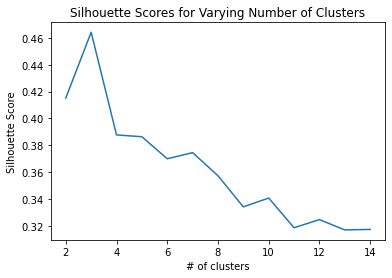

In [56]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1], label= "Silhouette Score")
plt.title("Silhouette Scores for Varying Number of Clusters")
plt.xlabel("# of clusters")
plt.ylabel("Silhouette Score")
plt.show()

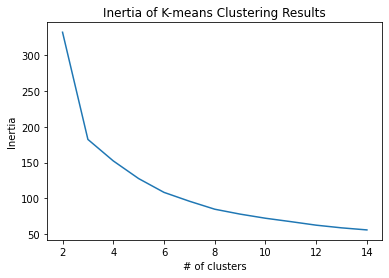

In [57]:
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1], label= "Inertia")
plt.title("Inertia of K-means Clustering Results")
plt.xlabel("# of clusters")
plt.ylabel("Inertia")
plt.show()

# FIND OPTIMUM "K" for k-Means



In [58]:

sse_ward = []

for k in range(2, 15):
    h_cluster = AgglomerativeClustering(n_clusters= k)
    h_cluster.fit(df_1)
    sse_ward.append([k, silhouette_score(df_1, h_cluster.labels_)])

print(sse_ward)

[[2, 0.4019790746550094], [3, 0.43093832826198164], [4, 0.35116774453201804], [5, 0.30950152021206523], [6, 0.309693173832713], [7, 0.32754253382806625], [8, 0.33105367175383915], [9, 0.30316358149467587], [10, 0.2634742433678927], [11, 0.25979106262600343], [12, 0.262941251940917], [13, 0.2741786010632178], [14, 0.2757327349152112]]


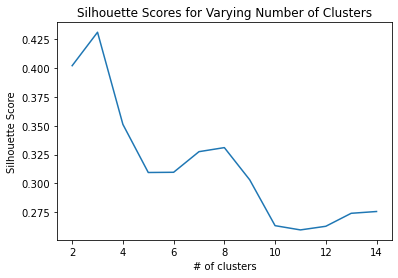

In [59]:
plt.plot(pd.DataFrame(sse_ward)[0], pd.DataFrame(sse_ward)[1], label= "Silhouette Score")
plt.title("Silhouette Scores for Varying Number of Clusters")
plt.xlabel("# of clusters")
plt.ylabel("Silhouette Score")
plt.show()

# since low inertia and high silhouette score is desirable, let "K" (number of clusters) equals 3
This is also in parallel with what dendrogram suggests


Hierarchical Cluster Analyses to find initial seeds for k-means

In [60]:


clustering= AgglomerativeClustering(n_clusters= 3) #linkage="ward", by default
clustering.fit(df_1)

AgglomerativeClustering(n_clusters=3)

# Just checking, Agglomerative clustering results



In [61]:

labels_v0= pd.DataFrame(clustering.labels_)
labels_v0
RFM_0= pd.concat([df, labels_v0], axis=1)
RFM_0.columns= ["CustomerID", "Recency", "Frequency", "Monetary", "R", "F", "M", "Cluster"]
RFM_0["Cluster"] = RFM_0["Cluster"] +1
RFM_ward= RFM_0
RFM_ward.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,Cluster
0,12749,4,5,98.35,0.009119,0.4,0.431227,1
1,12820,4,4,58.20,0.009119,0.3,0.255185,1
2,12821,215,1,19.92,0.650456,0.0,0.087342,2
3,12822,71,2,30.80,0.212766,0.1,0.135046,1
4,12824,60,1,5.04,0.179331,0.0,0.022098,1
5,12826,3,7,122.80,0.006079,0.6,0.538431,3
6,12827,6,3,84.21,0.015198,0.2,0.369229,1
7,12828,3,6,154.80,0.006079,0.5,0.678739,3
8,12831,263,1,34.20,0.796353,0.0,0.149954,2
9,12832,33,2,19.90,0.097264,0.1,0.087254,1


In [63]:
Clusters_R= pd.DataFrame(RFM_ward.groupby("Cluster").R.mean())
Clusters_R

,R
Cluster,
1,0.126690
2,0.646650
3,0.103992


In [64]:
Clusters_F= pd.DataFrame(RFM_ward.groupby("Cluster").F.mean())
Clusters_F

,F
Cluster,
1,0.159402
2,0.049784
3,0.517401


In [65]:
Clusters_M= pd.DataFrame(RFM_ward.groupby("Cluster").M.mean())
Clusters_M

,M
Cluster,
1,0.185205
2,0.143121
3,0.677158


# Initial seeds for k-means



In [66]:

clusters_ward= pd.concat([Clusters_R, Clusters_F, Clusters_M], axis=1)
initial_seeds= clusters_ward.to_numpy() #converting to numpy array
print(initial_seeds.dtype)
print(initial_seeds)

float64
[[0.1266899  0.15940217 0.18520487]
 [0.64664996 0.04978355 0.14312074]
 [0.10399227 0.51740139 0.67715798]]


# Compare this silhouette value with the silhouette value obtained from k-means with 'random' initial seeds

In [67]:
inertias_in_each_iteration= []
centroids= []
number_of_iterations = []

for i in range(20):
    model= KMeans(n_clusters= 3, init= initial_seeds, max_iter= 500, tol= 1e-10)
    model.fit(df_1)
    inertias_in_each_iteration.append(model.inertia_)
    centroids.append(model.cluster_centers_)
    number_of_iterations.append(model.n_iter_)

print(inertias_in_each_iteration)
print(centroids[-1])
print(number_of_iterations)
labels= model.labels_
labels= pd.Series(labels)
print(silhouette_score(df_1, labels))

[182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943, 182.38819976833943]
[[0.14478772 0.10794702 0.14451519]
 [0.69209347 0.04975    0.14476071]
 [0.11071863 0.46757493 0.55725792]]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
0.464066767372537


In [68]:
inertias_in_each_iteration= []
centroids= []
number_of_iterations = []

for i in range(300):
    model= KMeans(n_clusters= 3, init= 'random', n_init= 10, max_iter= 500, tol= 1e-10)
    model.fit(df_1)
    inertias_in_each_iteration.append(model.inertia_)
    centroids.append(model.cluster_centers_)
    number_of_iterations.append(model.n_iter_)

print(np.mean(inertias_in_each_iteration))
print(centroids[-1])
print(np.mean(number_of_iterations))
labels= model.labels_
labels= pd.Series(labels)
print(silhouette_score(df_1, labels))

182.3875714254629
[[0.11138229 0.4655496  0.55317526]
 [0.14521773 0.10605327 0.1432534 ]
 [0.69315404 0.04993726 0.14498399]]
9.606666666666667
0.4637264405614345


In [69]:
inertias_in_each_iteration= []
centroids= []
number_of_iterations = []

for i in range(300):
    model= KMeans(n_clusters= 3, init= 'random', n_init= 10, max_iter= 500, tol= 1e-10)
    model.fit(df_1)
    inertias_in_each_iteration.append(model.inertia_)
    centroids.append(model.cluster_centers_)
    number_of_iterations.append(model.n_iter_)

print(np.mean(inertias_in_each_iteration))
print(centroids[-1])
print(np.mean(number_of_iterations))
labels= model.labels_
labels= pd.Series(labels)
print(silhouette_score(df_1, labels))



182.3875503683164
[[0.14521773 0.10605327 0.1432534 ]
 [0.69315404 0.04993726 0.14498399]
 [0.11138229 0.4655496  0.55317526]]
9.736666666666666
0.4637264405614345


# Resulting dataframe showing customer R,F,M values and which cluster the customer belongs to



In [70]:

RFM_1 = pd.concat([df, pd.Series(labels)], axis= 1)
RFM_1.columns= ["CustomerID", "Recency", "Frequency", "Monetary", "R", "F", "M", "Cluster"]
RFM_1["Cluster"] = RFM_1["Cluster"] +1
RFM_1.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,Cluster
0,12749,4,5,98.35,0.009119,0.4,0.431227,3
1,12820,4,4,58.20,0.009119,0.3,0.255185,1
2,12821,215,1,19.92,0.650456,0.0,0.087342,2
3,12822,71,2,30.80,0.212766,0.1,0.135046,1
4,12824,60,1,5.04,0.179331,0.0,0.022098,1


# Number of customers in each cluster



In [71]:

RFM_1.groupby("Cluster").CustomerID.count()


Cluster
1    1652
2     797
3     746
Name: CustomerID, dtype: int64

In [72]:
Clusters_Recency= pd.DataFrame(RFM_1.groupby("Cluster").Recency.mean())
Clusters_Recency

,Recency
Cluster,
1,48.776634
2,229.047679
3,37.644772


In [73]:
Clusters_Frequency= pd.DataFrame(RFM_1.groupby("Cluster").Frequency.mean())
Clusters_Frequency

,Frequency
Cluster,
1,2.060533
2,1.499373
3,5.655496


In [74]:
Clusters_Monetary= pd.DataFrame(RFM_1.groupby("Cluster").Monetary.mean())
Clusters_Monetary

,Monetary
Cluster,
1,32.671804
2,33.066499
3,126.162681


# Finally creating new dataframe (1 for each cluster)



In [81]:

cluster_1= RFM_1[RFM_1["Cluster"]==1]
cluster_2= RFM_1[RFM_1["Cluster"]==2]
cluster_3= RFM_1[RFM_1["Cluster"]==3]
cluster_1.head()


,CustomerID,Recency,Frequency,Monetary,R,F,M,Cluster
1,12820,4,4,58.20,0.009119,0.3,0.255185,1
3,12822,71,2,30.80,0.212766,0.1,0.135046,1
4,12824,60,1,5.04,0.179331,0.0,0.022098,1
6,12827,6,3,84.21,0.015198,0.2,0.369229,1
9,12832,33,2,19.90,0.097264,0.1,0.087254,1
